### This project was taken from the following link and I use it to practice my skills
https://thecleverprogrammer.com/2020/08/06/whatsapp-group-chat-analysis/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [1]:
pip install emoji


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import regex as re
import pandas as pd
import numpy as np

import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords

In [4]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+)(\s)([0-9]+):([0-9]+)'
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [5]:
def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

In [6]:
def getDatapoint2(line):
    splitline = line.split(' - ')
    datetime = splitline[0]
    date, time = datetime.split(' ', 1)
    message_author = " ".join(splitline[1:])
    splitmessage = message_author.split(": ")
    author = splitmessage[0]
    message = " ".join(splitmessage[1:])
    return date, time, author, message

In [33]:
data = []
conversation = 'Chat de WhatsApp con Fam. Simón G. 😀.txt'

In [8]:
test = pd.read_csv(conversation, on_bad_lines='skip', header=None).head()
test.columns = ['text']
test

,text
0,06/09/15 1:30 p. m. - Tía Claudia Villegas: <M...
1,06/09/15 1:31 p. m. - Ileana Simon: Jaja
2,06/09/15 5:42 p. m. - Tío Tony: <Multimedia om...
3,06/09/15 5:43 p. m. - Tio Joaquin: Maravilloso
4,06/09/15 5:52 p. m. - Marie Gonzalez: Jajajaja...


In [9]:
with open(conversation, encoding='utf-8') as fp:
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            date, time, author, message = getDatapoint2(line)
            data.append([date, time, author, message])
        else:
            messageBuffer.append(line)        

In [10]:
messageBuffer

['Málaga y muchos mas en Pacabtun',
 'Que llega el',
 'Hombre en un',
 'Coche y te ofrece que tengas en tu casa a la virgencita peregrina por un día te pide invites a tus amigas para darle la bienvenida al día siguiente y te pide colaboración para comprar las rosas q porque esas le gustan a la virgencita y las veladoras y un pequeño apoyo para el refrigerio inicia con 2000 y si dices q no tienes esa cantidad te pide lo q tengas .y la virgen',
 'Nunca llega .... También te ofrece bendecir tu casa . La arquidiócesis ya esta enterada y dice q se pida identificación del',
 'Sacerdote pirata y las placas, y de ser posible avisa a tu parroquia.',
 'Me acaba de hablar mi amiga del coro, que dejo su reja abierta xque su marido soli fue a llevar al niño a la escuela y entro a su garage un auto negro y se bajo uno disfrazado de Sacerdote y le pidio tambien desayuno. Cuando vio que agarro su telefono se fueron rápido.',
 'Estaba saliendo de farmacia homeopática en circuito colonias y se le acerca

In [11]:
df = pd.DataFrame(data, columns=['Date', 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Time,Author,Message
0,2015-06-09,1:30 p. m.,Tía Claudia Villegas,<Multimedia omitido>
1,2015-06-09,1:31 p. m.,Ileana Simon,Jaja
2,2015-06-09,5:42 p. m.,Tío Tony,<Multimedia omitido>
3,2015-06-09,5:43 p. m.,Tio Joaquin,Maravilloso
4,2015-06-09,5:52 p. m.,Marie Gonzalez,Jajajajajaja


In [12]:
words_remove = ['cambió', 'añadió', 'cifrados', 'salió del grupo']

In [13]:
df['check'] = df['Author'].map(lambda x: 1 if any(word in x for word in words_remove) else 0)

In [14]:
df.check.value_counts()

0    39956
1       43
Name: check, dtype: int64

In [15]:
df.drop(index = df[df['check'] == 1].index, inplace=True)

In [16]:
df.check.value_counts()

0    39956
Name: check, dtype: int64

In [17]:
df.Author.unique()

array(['Tía Claudia Villegas', 'Ileana Simon', 'Tío Tony', 'Tio Joaquin',
       'Marie Gonzalez', 'Tita Jose Gaber', 'Tio Luis Simon',
       'Tia Ileana Sales', 'Ceci Simón', 'Lizbeth Hadad', 'Tony Simon',
       'Ricardo Gonzalez', 'Roberto Simon', 'Halim', 'Ana Laura Simon',
       'Jr Alex Simon', 'Tia Jose', 'Estelita Simón',
       'Marifer Novelo Simon', '+52 999 122 9955',
       'Fernando / Leslie Tamez', 'Isabel Simon', 'Alex Simon Palma',
       'Irma Madariaga', 'Joaquin Gonzalez', 'Lula Cortazar',
       'Ana Luisa Santos Ortiz', '+52 999 122 4775', 'Jose Novelo Simon',
       '+52 55 1082 1091', 'Tío Alex Simón', 'David Wegan',
       'Tino Abraham'], dtype=object)

In [18]:
df.drop(['check'], axis=1, inplace=True)

In [19]:
df.head()

,Date,Time,Author,Message
0,2015-06-09,1:30 p. m.,Tía Claudia Villegas,<Multimedia omitido>
1,2015-06-09,1:31 p. m.,Ileana Simon,Jaja
2,2015-06-09,5:42 p. m.,Tío Tony,<Multimedia omitido>
3,2015-06-09,5:43 p. m.,Tio Joaquin,Maravilloso
4,2015-06-09,5:52 p. m.,Marie Gonzalez,Jajajajajaja


In [20]:
media = df[df['Message'] == '<Multimedia omitido>'].shape[0]
media

10056

In [21]:
url_pattern = r'(https://\S+)'
df['url_count'] = df.Message.apply(lambda x: re.findall(url_pattern, x)).str.len()

In [22]:
links = df.url_count.sum()

In [23]:
media_msgs = df[df['Message'] == '<Multimedia omitido>']
msgs_df = df.drop(media_msgs.index)
msgs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29900 entries, 1 to 39998
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       29900 non-null  datetime64[ns]
 1   Time       29900 non-null  object        
 2   Author     29900 non-null  object        
 3   Message    29900 non-null  object        
 4   url_count  29900 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.4+ MB


In [24]:
msgs_df['letter_count'] = msgs_df['Message'].apply(lambda x: len(x))
msgs_df['word_count'] = msgs_df['Message'].apply(lambda x: len(x.split(' ')))
msgs_df['message_count'] = 1


In [25]:
l = ['Ileana Simon', 'Tio Joaquin', 'Marie Gonzalez', 'Tita Jose Gaber']

In [26]:
for i in range(len(l)):
    req_df = msgs_df[msgs_df['Author'] == l[i]]
    print(f'Stats of {l[i]}')
    print('Messages sent: ', req_df.shape[0])
    words_per_msg = req_df['word_count'].sum()/req_df.shape[0]
    print('Words per msg: ', words_per_msg)
    media = media_msgs[media_msgs['Author'] == l[i]].shape[0]
    print('Media messages sent: ', media)
    links = sum(req_df['url_count'])
    print('Links sent: ', links)
    print()

Stats of Ileana Simon
Messages sent:  5610
Words per msg:  4.231016042780749
Media messages sent:  1490
Links sent:  12

Stats of Tio Joaquin
Messages sent:  840
Words per msg:  6.544047619047619
Media messages sent:  232
Links sent:  6

Stats of Marie Gonzalez
Messages sent:  555
Words per msg:  3.5693693693693693
Media messages sent:  116
Links sent:  0

Stats of Tita Jose Gaber
Messages sent:  3908
Words per msg:  7.8431422722620265
Media messages sent:  1751
Links sent:  76



In [27]:
text = ' '.join(review for review in msgs_df.Message)
print('There are {} words in all the messages'.format(len(text)))

There are 937800 words in all the messages


In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\52551\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
stopwords = set(stopwords.words('spanish'))

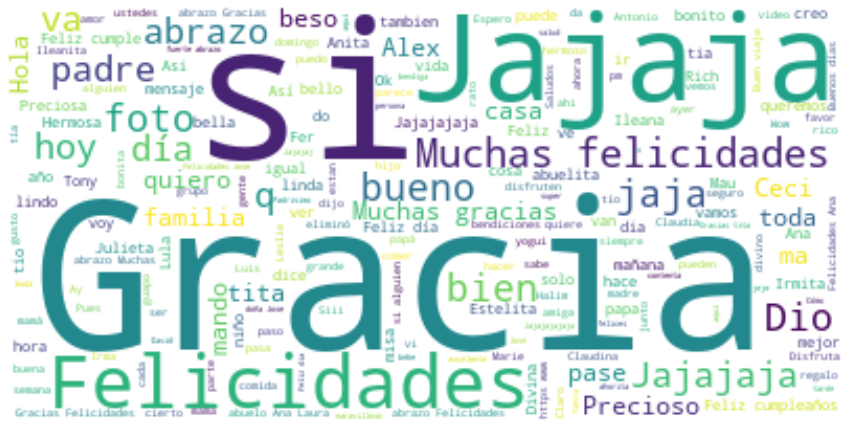

In [30]:
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Author name:  Ileana Simon


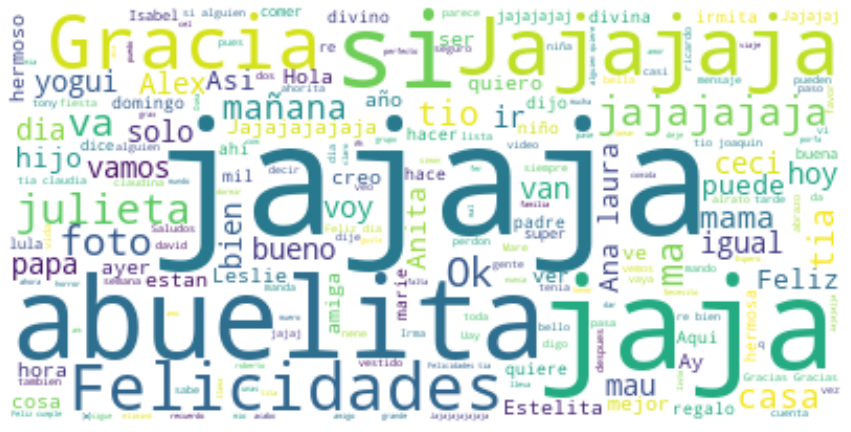

Author name:  Tio Joaquin


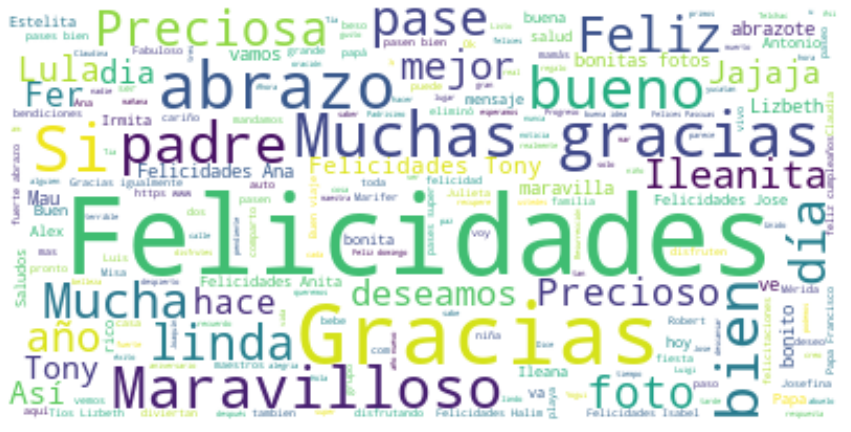

Author name:  Marie Gonzalez


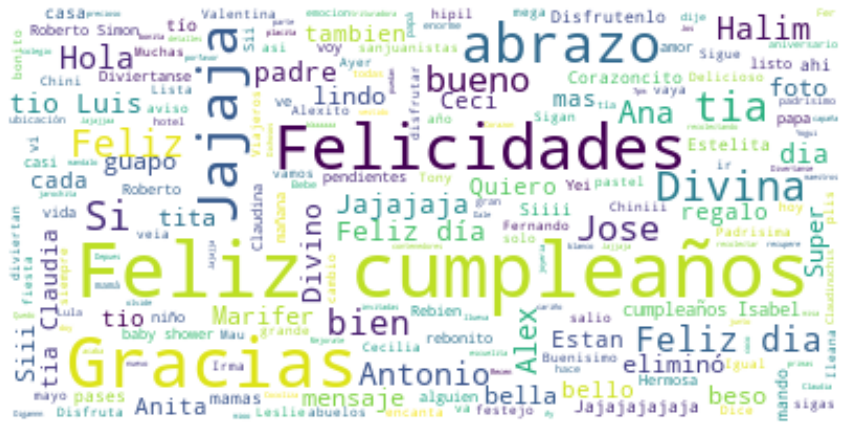

Author name:  Tita Jose Gaber


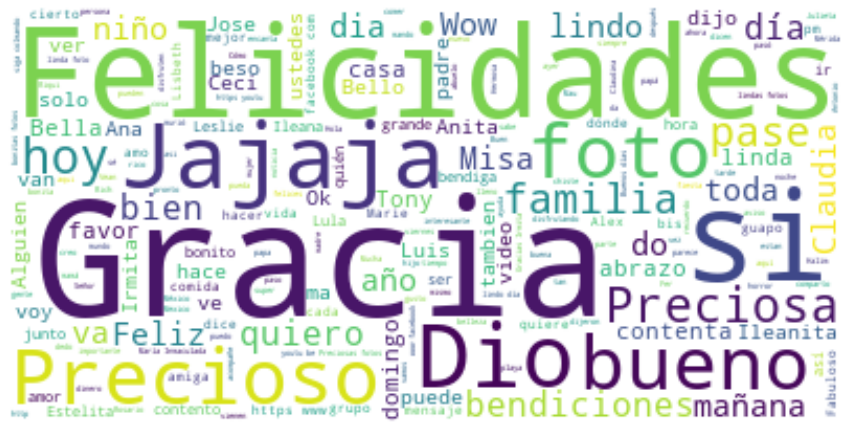

In [32]:
for i in range(len(l)):
    dummy_df = msgs_df[msgs_df['Author'] == l[i]]
    text = ' '.join(review for review in dummy_df.Message)
    print('Author name: ', l[i])
    wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()